# Business Understanding

In [ ]:
#initial reactions: which studio to work with? which genre?? which months are best to release??

#adjust $$$ for inflation

#sql join movie basics and movie ratings table: use IMDB avg ratings to prove which GENRES have better RATINGS

#sql join """" to show RATINGS versus RUN TIME

#using bom_df: which STUDIOS make most MONEY (to study them further..?)

#use TN data to show PRODUCTION BUDGET versus gross $$ to show if spending a certain amount on production has higher pay off

# Data Understanding

Box Office Mojo
IMDB
Rotten Tomatoes
TheMovieDB
The Numbers


## Data Preparation

In [11]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import pandasql
%matplotlib inline

In [73]:
conn = sqlite3.connect('data/im.db')
cur = conn.cursor()

In [74]:
imdb_ratings_df = pd.read_sql("""
    SELECT *
    FROM movie_ratings;
""", conn)
imdb_ratings_df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [75]:
imdb_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [76]:
imdb_basics_df = pd.read_sql("""
    SELECT *
    FROM movie_basics;
""", conn)
imdb_basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [77]:
imdb_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [78]:
imdb_basics_df.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [79]:
imdb_ratings_df.head(2) 

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


In [80]:
imdb_basics_df.head(2) 

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [83]:
imdb_ratings_ord_df = imdb_ratings_df.sort_values(by = ['movie_id'])
imdb_ratings_ord_df.reset_index(drop=True, inplace = True)
imdb_ratings_ord_df #Making a new dataframe of organized values for imdb ratings

,movie_id,averagerating,numvotes
0,tt0063540,7.0,77
1,tt0066787,7.2,43
2,tt0069049,6.9,4517
3,tt0069204,6.1,13
4,tt0100275,6.5,119
...,...,...,...
73851,tt9913084,6.2,6
73852,tt9914286,8.7,136
73853,tt9914642,8.5,8
73854,tt9914942,6.6,5


In [84]:
imdb_basics_ord_df = imdb_basics_df.sort_values(by = ['movie_id'])
imdb_basics_ord_df.reset_index(drop=True, inplace = True)
imdb_basics_ord_df #Making a new dataframe of organized values for imdb basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [85]:
imdb_comb_df = pd.merge(imdb_ratings_ord_df,
                      imdb_basics_ord_df[['movie_id', 'primary_title', 'original_title', 'start_year', 'runtime_minutes',
                                 'genres']], on = 'movie_id')
imdb_comb_df #Merging the dataframes to see which movie titles had which ratings

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,7.0,77,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,7.2,43,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,6.9,4517,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,6.1,13,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,6.5,119,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...,...,...
73851,tt9913084,6.2,6,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary
73852,tt9914286,8.7,136,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family"
73853,tt9914642,8.5,8,Albatross,Albatross,2017,NaN,Documentary
73854,tt9914942,6.6,5,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None


In [86]:
imdb_comb_df['genres'].value_counts() #looking at the different genre types

Drama                             11612
Documentary                       10313
Comedy                             5613
Horror                             2692
Comedy,Drama                       2617
                                  ...  
Documentary,History,Reality-TV        1
Crime,Drama,News                      1
Comedy,Drama,Reality-TV               1
Animation,Music,Romance               1
Fantasy,Horror,Music                  1
Name: genres, Length: 923, dtype: int64

In [87]:
imdb1 = imdb_comb_df.groupby(['genres', 'averagerating']).sum().reset_index().groupby('genres').mean()
imdb1 #making a new dataframe to look at average rating of each genre 

,averagerating,numvotes,start_year,runtime_minutes
genres,,,,
Action,5.500000,4165.278481,24961.670886,941.873418
"Action,Adult,Comedy",4.650000,18.000000,2014.000000,35.500000
"Action,Adventure",5.220930,2535.139535,3185.255814,151.906977
"Action,Adventure,Animation",6.027273,81148.704545,7646.613636,333.886364
"Action,Adventure,Biography",6.988235,58805.941176,2489.176471,111.705882
...,...,...,...,...
Thriller,5.233784,5953.567568,42335.972973,1651.432432
"Thriller,War",5.650000,1791.500000,2013.250000,88.750000
"Thriller,Western",7.150000,3322.000000,2013.250000,47.500000


In [94]:
imdb1_av_rt = imdb1.sort_values(by = ['averagerating'], ascending = False)
imdb1_av_rt #Making a new dataframe by sorting by average rating

,averagerating,numvotes,start_year,runtime_minutes
genres,,,,
"Comedy,Documentary,Fantasy",9.4,5.0,2015.0,70.0
"Documentary,Family,Musical",9.3,19.0,2017.0,59.0
"History,Sport",9.2,5.0,2016.0,0.0
"Music,Mystery",9.0,5.0,2012.0,0.0
Game-Show,9.0,7.0,2013.0,130.0
...,...,...,...,...
"Crime,Music",2.4,88.0,2018.0,94.0
"Adventure,Crime,Romance",2.3,9.0,2011.0,86.0
"History,Sci-Fi,Thriller",2.3,227.0,2017.0,120.0


In [95]:
imdb1_av_rt.reset_index(inplace=True) #resetting the index

In [96]:
imdb1_av_rt.head(15)

,genres,averagerating,numvotes,start_year,runtime_minutes
0,"Comedy,Documentary,Fantasy",9.4,5.0,2015.0,70.0
1,"Documentary,Family,Musical",9.3,19.0,2017.0,59.0
2,"History,Sport",9.2,5.0,2016.0,0.0
3,"Music,Mystery",9.0,5.0,2012.0,0.0
4,Game-Show,9.0,7.0,2013.0,130.0
5,"Documentary,News,Sport",8.8,25.0,2017.0,85.0
6,"Documentary,News,Reality-TV",8.8,8.0,2014.0,61.0
7,"Drama,Fantasy,War",8.8,22.0,2016.0,0.0
8,"Drama,Short",8.8,8.0,2018.0,18.0
9,"Comedy,Drama,Reality-TV",8.8,15.0,2016.0,0.0


In [97]:
del imdb1_av_rt['start_year']
del imdb1_av_rt['numvotes']
del imdb1_av_rt['runtime_minutes']

In [100]:
imdb1_av_rt = imdb1_av_rt.head(10)

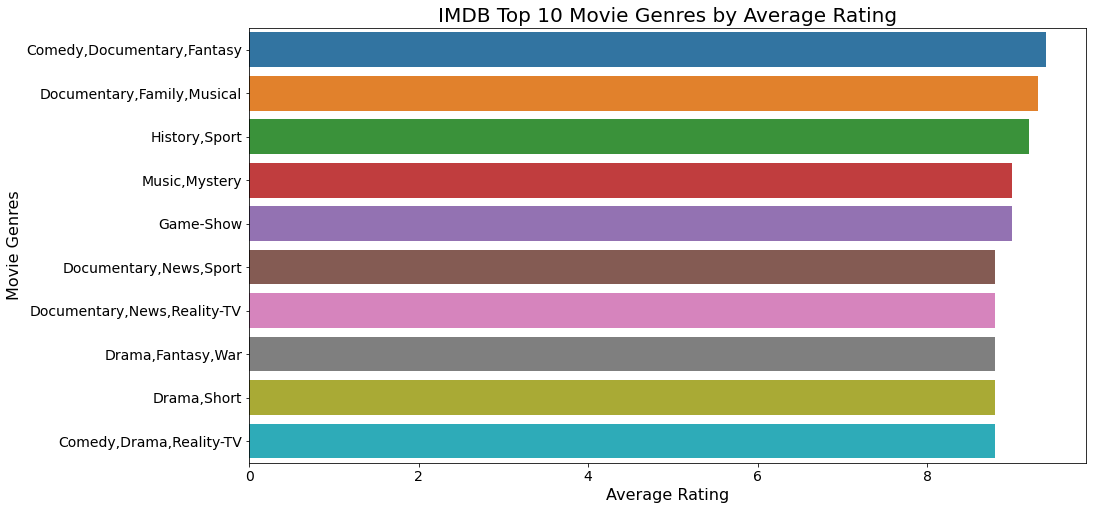

In [103]:
plt.figure(figsize = (15, 8))
ax = sns.barplot(x = 'averagerating', y = 'genres', data = imdb1_av_rt)
plt.xlabel('Average Rating', fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Movie Genres', fontsize = 16)
plt.yticks(fontsize = 14)
plt.title('IMDB Top 10 Movie Genres by Average Rating', fontsize = 20)
plt.show(); #Making a better bar graph

In [66]:
imdb2 = imdb_comb_df.groupby(['genres', 'numvotes']).sum().reset_index().groupby('genres').mean()
imdb2 #New dataframe with the average rating of each genre and number of votes

,numvotes,averagerating,start_year,runtime_minutes
genres,,,,
Action,910.437126,16.876647,5904.107784,222.778443
"Action,Adult,Comedy",18.000000,4.650000,2014.000000,35.500000
"Action,Adventure",1676.446154,5.464615,2107.169231,100.492308
"Action,Adventure,Animation",24115.945946,7.405405,2273.317568,99.263514
"Action,Adventure,Biography",49984.600000,7.415000,2115.800000,94.950000
...,...,...,...,...
Thriller,801.040948,19.116595,6751.857759,263.375000
"Thriller,War",1791.500000,5.650000,2013.250000,88.750000
"Thriller,Western",3322.000000,7.150000,2013.250000,47.500000


In [67]:
imdb2_vote= imdb2.sort_values(by = ['numvotes'], ascending = False)
imdb2_vote #Making a new dataframe that is sorted by number of votes 

,numvotes,averagerating,start_year,runtime_minutes
genres,,,,
"Action,Adventure,Sci-Fi",195108.474576,6.087288,2168.211864,113.169492
"Adventure,Mystery,Sci-Fi",135042.500000,5.075000,2013.500000,105.500000
"Action,Fantasy,War",131509.000000,6.400000,2016.000000,51.000000
"Adventure,Drama,Sci-Fi",104543.894737,6.494737,2120.842105,109.789474
"Action,Adventure,Fantasy",96588.500000,5.533000,2074.970000,108.320000
...,...,...,...,...
"Music,Mystery",5.000000,9.000000,2012.000000,0.000000
"Comedy,Documentary,Fantasy",5.000000,9.400000,2015.000000,70.000000
"Horror,Musical,Romance",5.000000,5.200000,2013.000000,0.000000


In [71]:
imdb2_vote.reset_index(inplace=True)

In [72]:
imdb2_vote.head(20)

,genres,numvotes,averagerating,start_year,runtime_minutes
0,"Action,Adventure,Sci-Fi",195108.474576,6.087288,2168.211864,113.169492
1,"Adventure,Mystery,Sci-Fi",135042.500000,5.075000,2013.500000,105.500000
2,"Action,Fantasy,War",131509.000000,6.400000,2016.000000,51.000000
3,"Adventure,Drama,Sci-Fi",104543.894737,6.494737,2120.842105,109.789474
4,"Action,Adventure,Fantasy",96588.500000,5.533000,2074.970000,108.320000
5,"Biography,Drama,Thriller",84506.909091,6.504545,2014.818182,108.090909
6,"Action,Adventure,Thriller",83279.511111,6.253333,2238.044444,112.622222
7,"Action,Crime,Sci-Fi",78214.125000,5.875000,2013.500000,105.375000
8,"Action,Adventure,Mystery",66149.272727,5.563636,2013.545455,87.181818
9,"Adventure,Drama,Fantasy",61488.175000,7.432500,2417.100000,129.650000


In [15]:
#Creating a dataframe for Box Office Money data
bom_df = pd.read_csv('data/bom.movie_gross.csv.gz')
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [25]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [34]:
bom_df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [16]:
#Creating a dataframe for The Movie Database data
tmdb_df = pd.read_csv('data/tmdb.movies.csv.gz')
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [17]:
#Creating a dataframe for Rotten Tomatoes Info data
rtinf_df = pd.read_csv('data/rt.movie_info.tsv.gz', delimiter = '\t', encoding = 'unicode_escape')
rtinf_df.head() 

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [27]:
rtinf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [35]:
rtinf_df.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [18]:
#Creating a dataframe for Rotten Tomatoes Reviews data
rtrev_df = pd.read_csv('data/rt.reviews.tsv.gz', delimiter = '\t', encoding = 'unicode_escape')
rtrev_df.head() 

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [29]:
rtrev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [36]:
rtrev_df.isnull().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [19]:
#Creating a dataframe for The Numbers data
tn_df = pd.read_csv('data/tn.movie_budgets.csv.gz')
tn_df.head() 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [37]:
tn_df.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

# Exploratory Data Analysis

# Conclusions

## Limitations

## Recommendations

## Next Steps